# Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import reverse_geocoder as rg

sns.set_style(style="darkgrid")
sns.set_palette("viridis")

In [2]:
# Path for the data
path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'housing.csv')

df = pd.read_csv(path)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#checking for duplicates
df.duplicated(subset=["longitude","latitude","total_rooms","median_house_value"]).sum()

np.int64(0)

In [6]:
#checking for nans
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# filling nans
df["total_bedrooms"] = df.loc[:,"total_bedrooms"].fillna(df["total_bedrooms"].median())

In [8]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#checking for outliers
df[df["total_bedrooms"]<3.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY


## Feature Engineering

In [11]:
# getting the city from longitude and latitude
coords = list(zip(df['latitude'], df['longitude']))
results = rg.search(coords)
df['city'] = [result['name'] for result in results]

Loading formatted geocoded file...


In [12]:
# binning income
df["income_bracket"] = pd.cut(df["median_income"],bins = [0,2.5,5,7.5,10,15.5],labels=["<25k$","25k$-50k$","50k$-75k$","75k$-100k$",">100k$"])

In [24]:
df.to_csv(os.path.join(os.path.dirname(os.getcwd()), 'data', 'housing_cleaned.csv'), index=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  city                20640 non-null  object  
 11  income_bracket      20640 non-null  category
dtypes: category(1), float64(9), object(2)
memory usage: 1.8+ MB


# EDA

## Univariate EDA

In [14]:
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = list(set(df.columns) - set(num_cols))
cat_cols,num_cols

(['ocean_proximity', 'city', 'income_bracket'],
 ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value'])

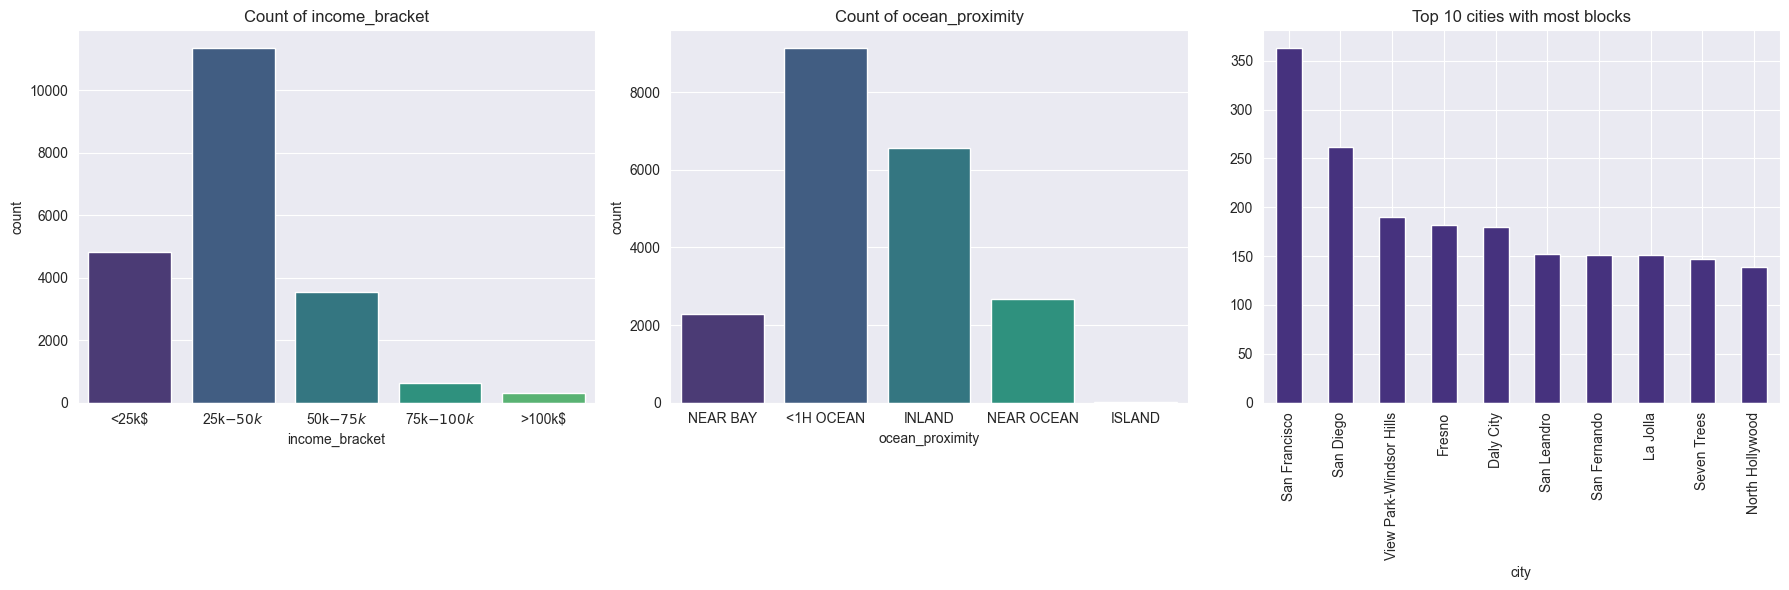

In [15]:
fig,axes = plt.subplots(1,3, figsize=(18,6))

for i,col in enumerate(["income_bracket","ocean_proximity"]):
    sns.countplot(data=df,x=col,ax=axes[i], hue=col)
    axes[i].set_title(f"Count of {col}")
axes[2] = df["city"].value_counts().head(10).plot(kind="bar",title = "Top 10 cities with most blocks")
plt.tight_layout()
plt.show()

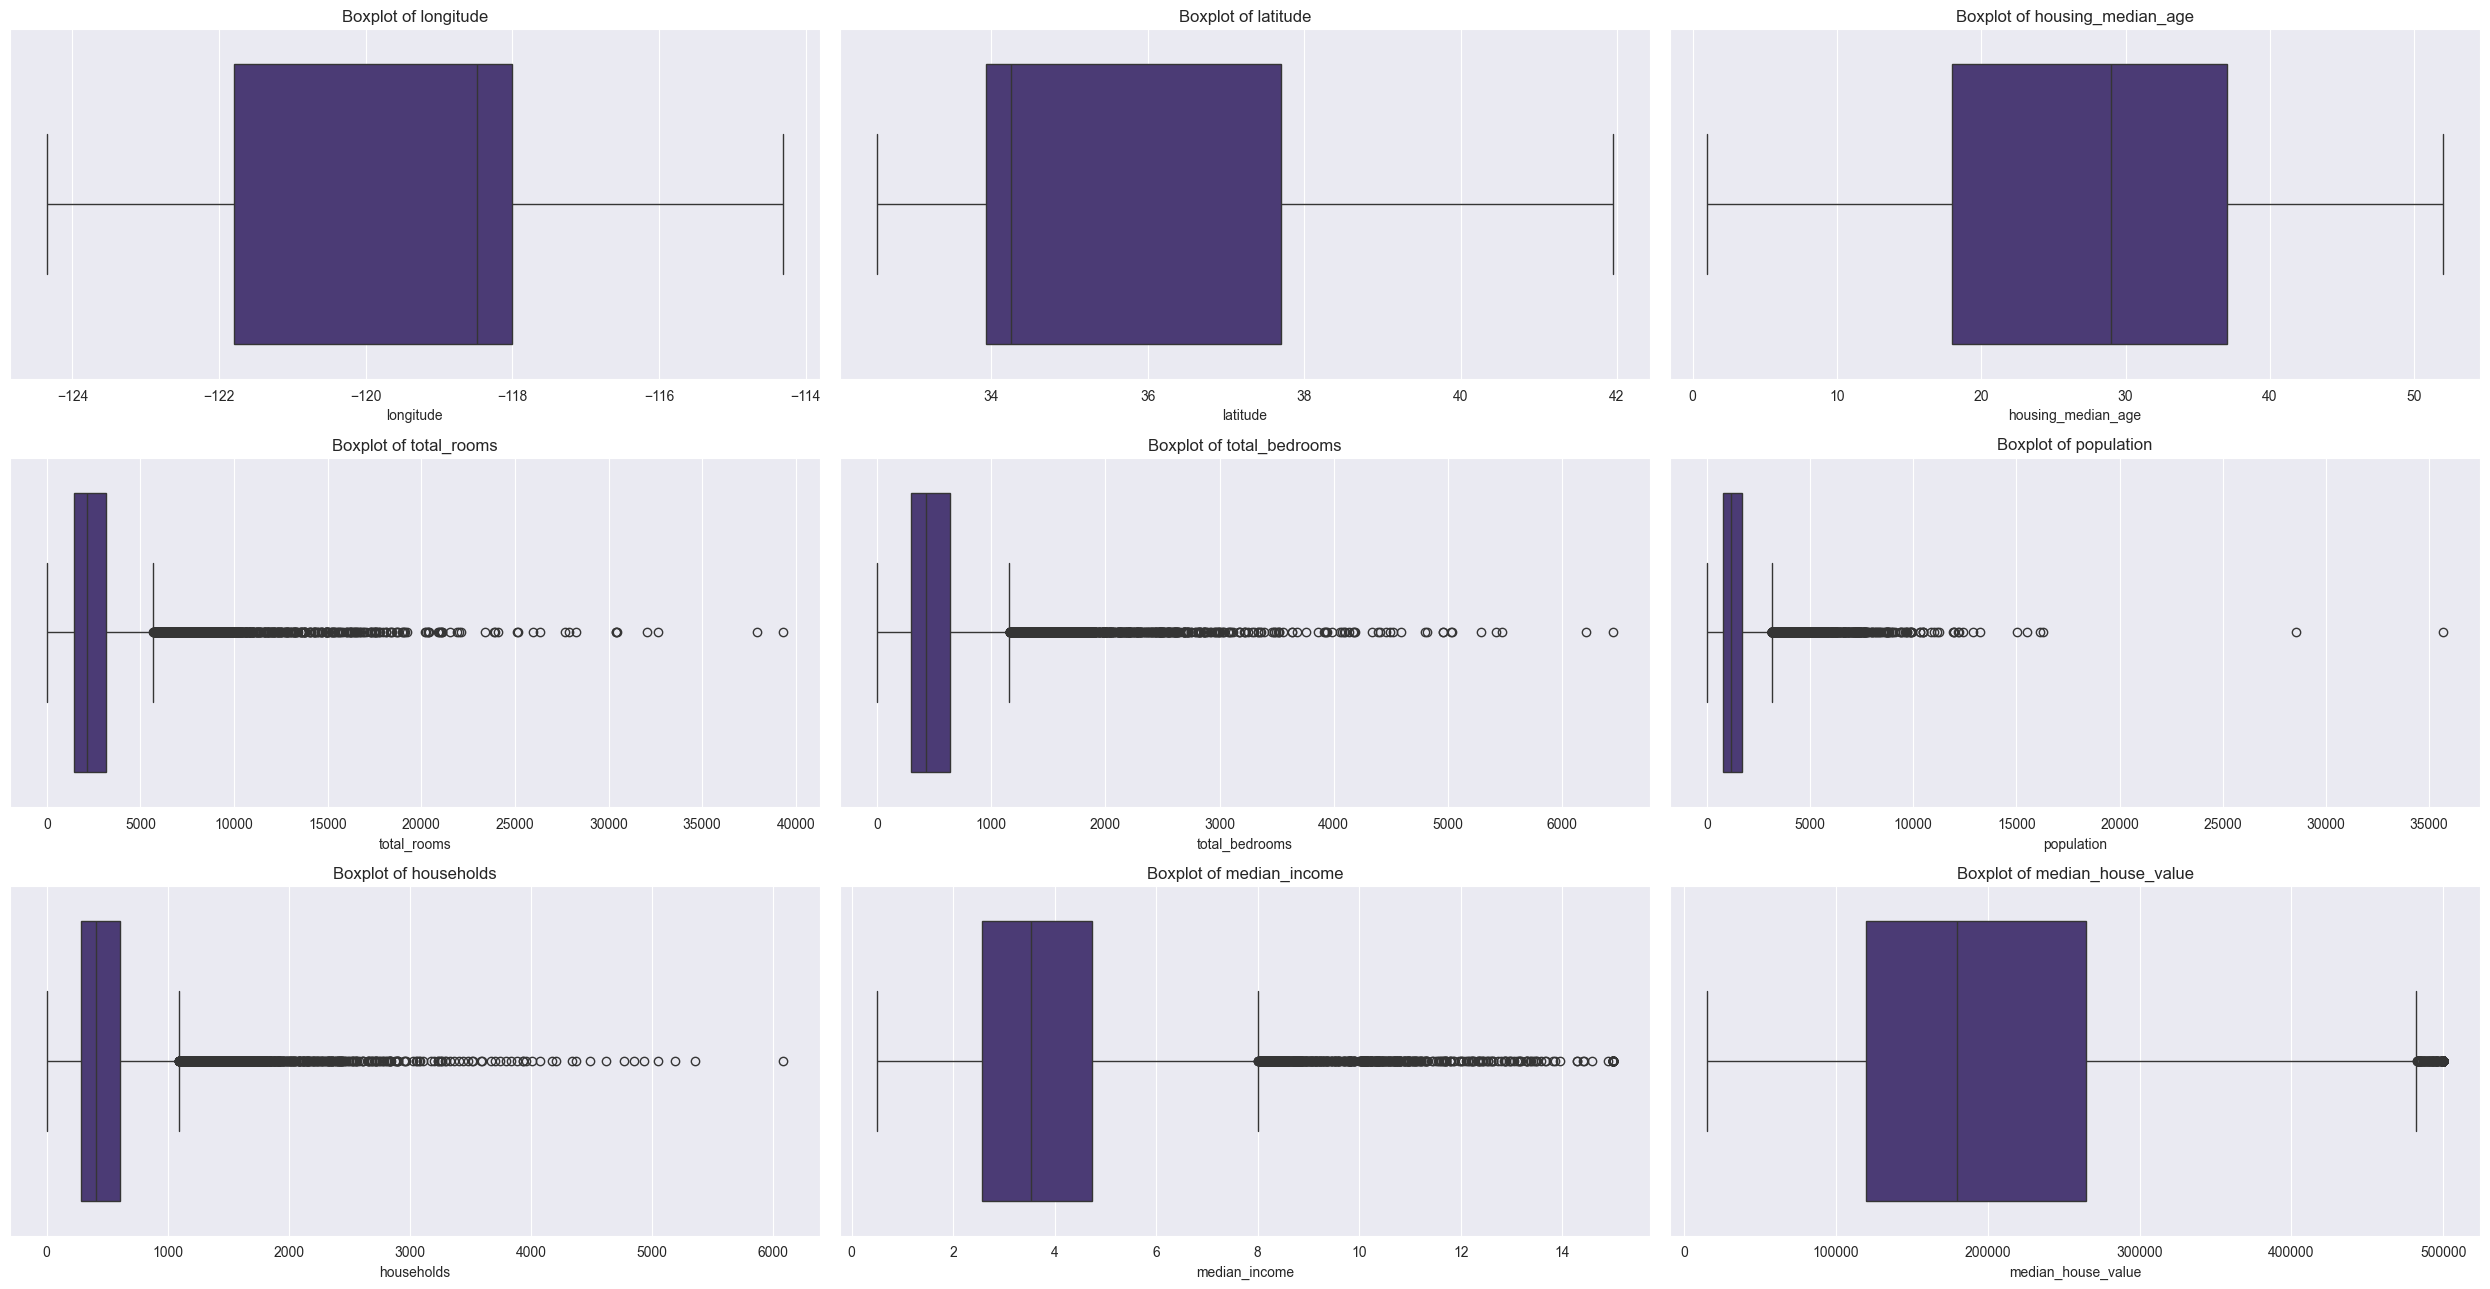

In [16]:
fig,axes = plt.subplots(3,3,figsize=(25,13))
axes = axes.flatten()

for i,col in enumerate(num_cols):
    sns.boxplot(data=df,x=col,ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    
plt.tight_layout()
plt.show()

### **Obeservations**:-

- The data shows that income is heavily skewed with most people lying in the bracket of 25k-50k

- The middle class (50k$-75k$) represents a big but smaller segment

- The >100k$ and 75$-100k$ segment is very small suggesting a problem in housing affordability because median house value is mostly normal

- The number of blocks according to ocean proximity goes: <1h away>inland>near ocean>near bay>island

## Multivariate EDA

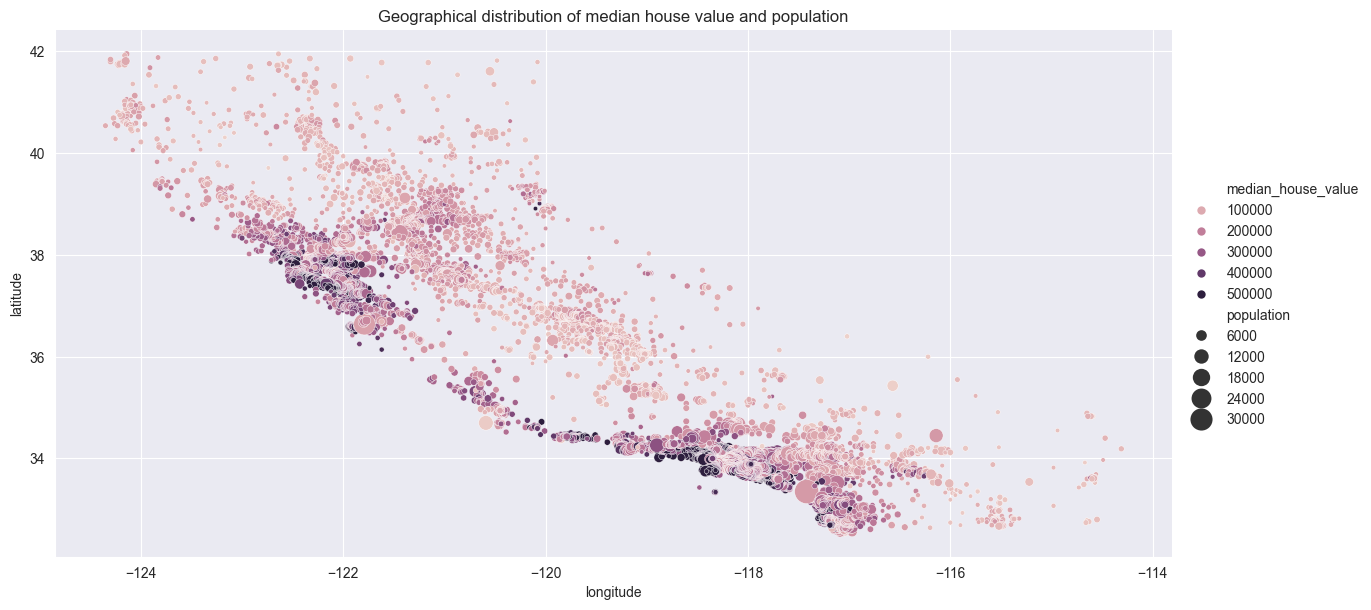

In [17]:
# plotting median house value and population across geographical locations
sns.relplot(data=df,x="longitude",y="latitude",hue="median_house_value",size="population",sizes=(10,300),aspect=2,height=6)
plt.title("Geographical distribution of median house value and population")
plt.show()

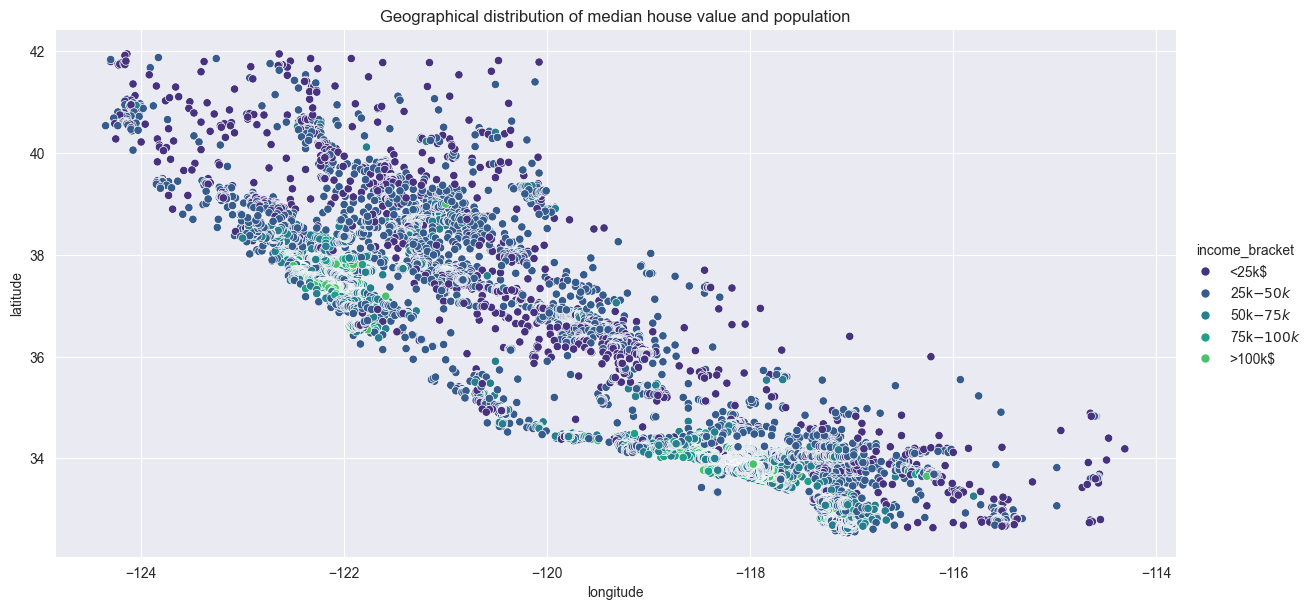

In [18]:
# plotting median house value and population across geographical locations
sns.relplot(data=df,x="longitude",y="latitude",hue="income_bracket",aspect=2,height=6)
plt.title("Geographical distribution of median house value and population")
plt.show()

### **Observations**:-

**Coastal Concentration:**
- Highest-value properties (dark purple) clustered along coastline
- Clear north-south corridor of expensive housing from SF Bay to LA
- Inland areas show consistently lower values with sparse high-value exceptions

**Population Density vs. Value:**
- Large population centers (big circles) often coincide with high values
- Some smaller communities show extremely high values (likely exclusive coastal towns)
- Geographic arbitrage opportunity between coastal and inland markets clearly visible

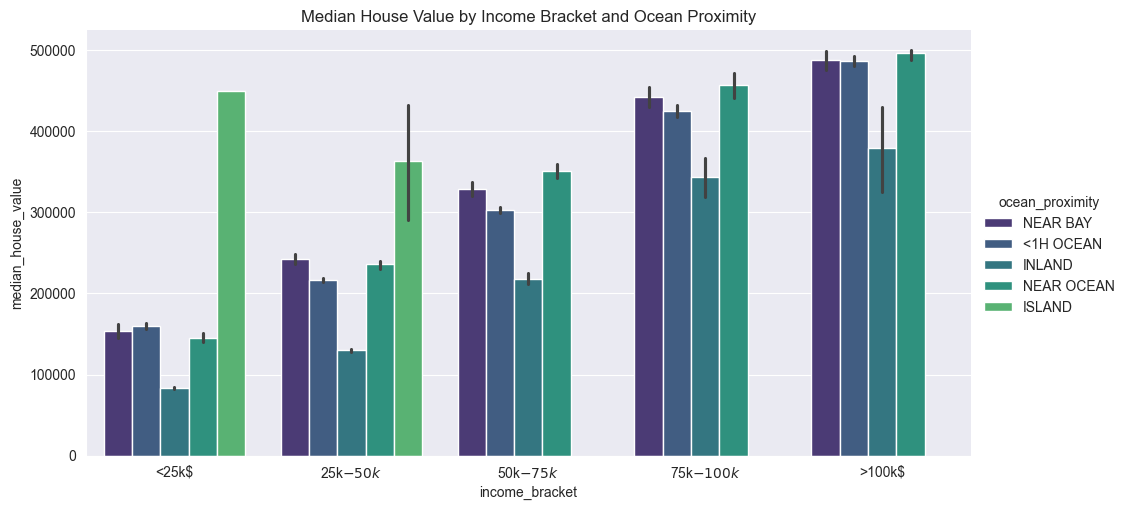

In [19]:
# plotting median house value by income bracket and ocean proximity
sns.catplot(
    data=df,
    x="income_bracket", y="median_house_value",
    kind="bar", height=5, aspect=2,hue="ocean_proximity"
)
plt.title("Median House Value by Income Bracket and Ocean Proximity")
plt.show()

### **Observations:**
- Lower income areas (<$25k): Location has minimal impact on housing values
- Higher income areas (>$75k): Ocean proximity creates dramatic value premiums
- Island properties command 2-3x premium over inland areas in same income bracket

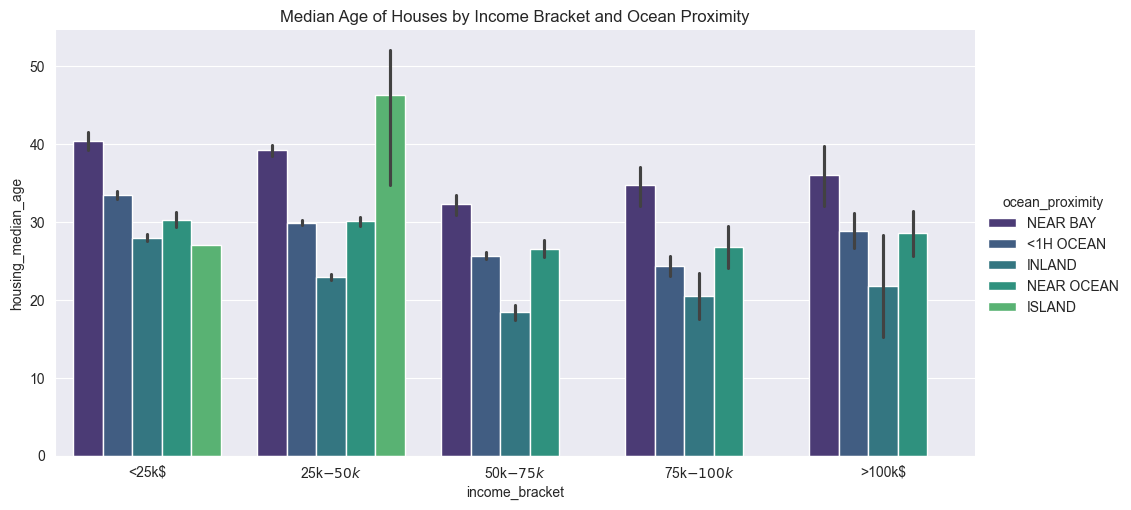

In [20]:
# plotting median house age by income bracket and ocean proximity
sns.catplot(data=df,x="income_bracket",y="housing_median_age",kind="bar",height=5,aspect=2,hue="ocean_proximity")
plt.title("Median Age of Houses by Income Bracket and Ocean Proximity")
plt.show()

### **Observations**:-

**Income-Age Relationship:**
- Lower income areas show older housing stock (35-40+ years average)
- Higher income areas have more varied ages, suggesting ongoing development/renovation

**Location-Age Patterns:**
- Islands show extreme age variation (high error bars), likely due to small sample size
- Coastal areas generally newer than inland equivalents in same income brackets

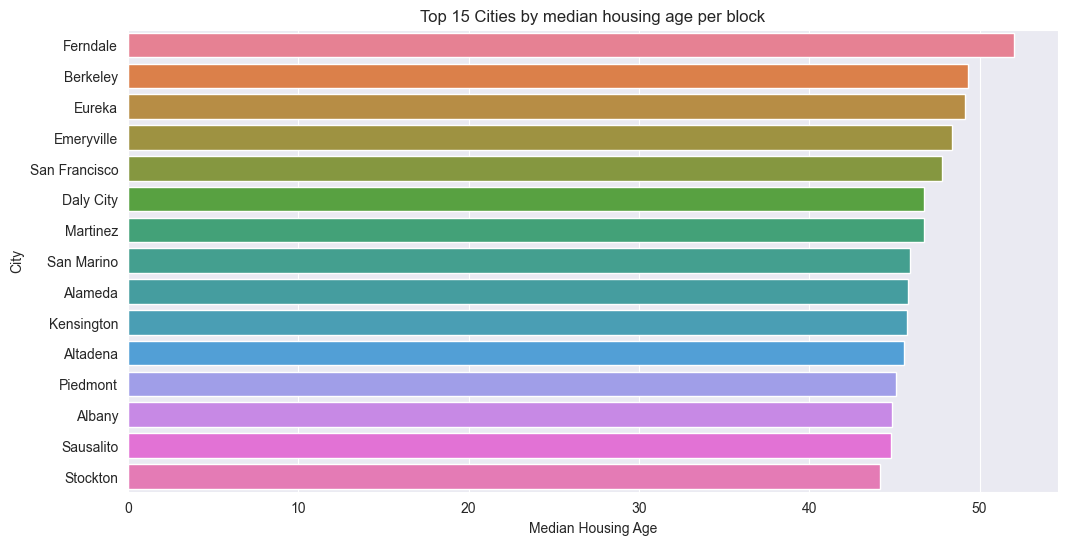

In [21]:
# plotting top 15 cities by median housing age per block
grp = df.groupby("city")["housing_median_age"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=grp.reset_index(), x="housing_median_age", y="city",hue="city")
plt.title("Top 15 Cities by median housing age per block")

plt.xlabel("Median Housing Age")
plt.ylabel("City")

plt.show()

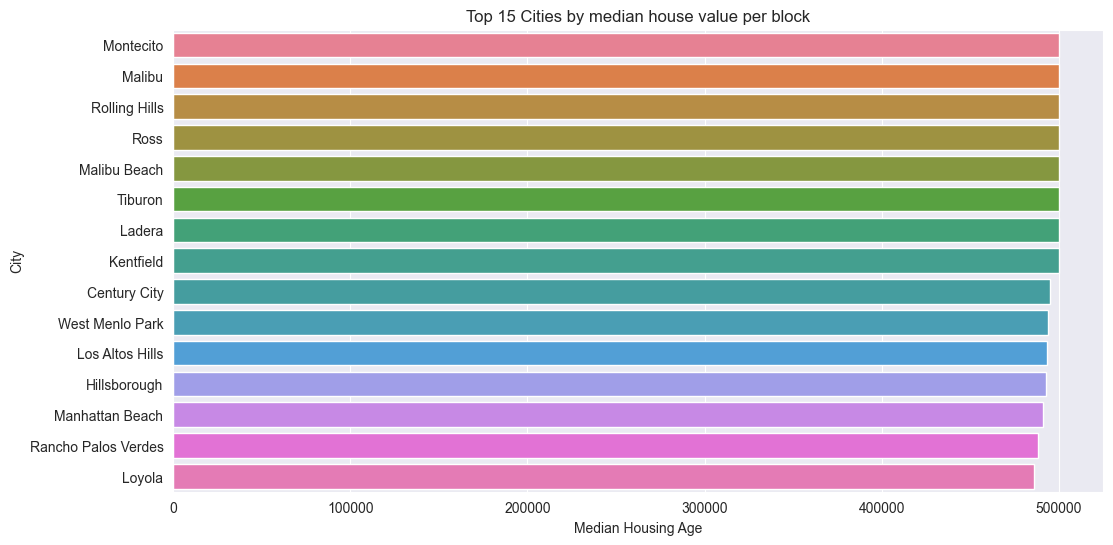

In [22]:
# plotting top 15 cities by median house value per block
grp = df.groupby("city")["median_house_value"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=grp.reset_index(), x="median_house_value", y="city",hue="city")
plt.title("Top 15 Cities by median house value per block")

plt.xlabel("Median Housing Age")
plt.ylabel("City")

plt.show()

### **Observations**:-

- Ferndale, Berkeley, Eureka lead in housing age (~45-50 years)
- Suggests these are established, mature housing markets
- Stockton shows newer stock, indicating recent development/growth

**Ultra-High-Value Concentration:**
- Montecito, Malibu, Rolling Hills top the premium market (>$500k median)
- Clear coastal/exclusive community dominance in top tier
- Loyola (likely Loyola Marymount area) shows inland premium exception

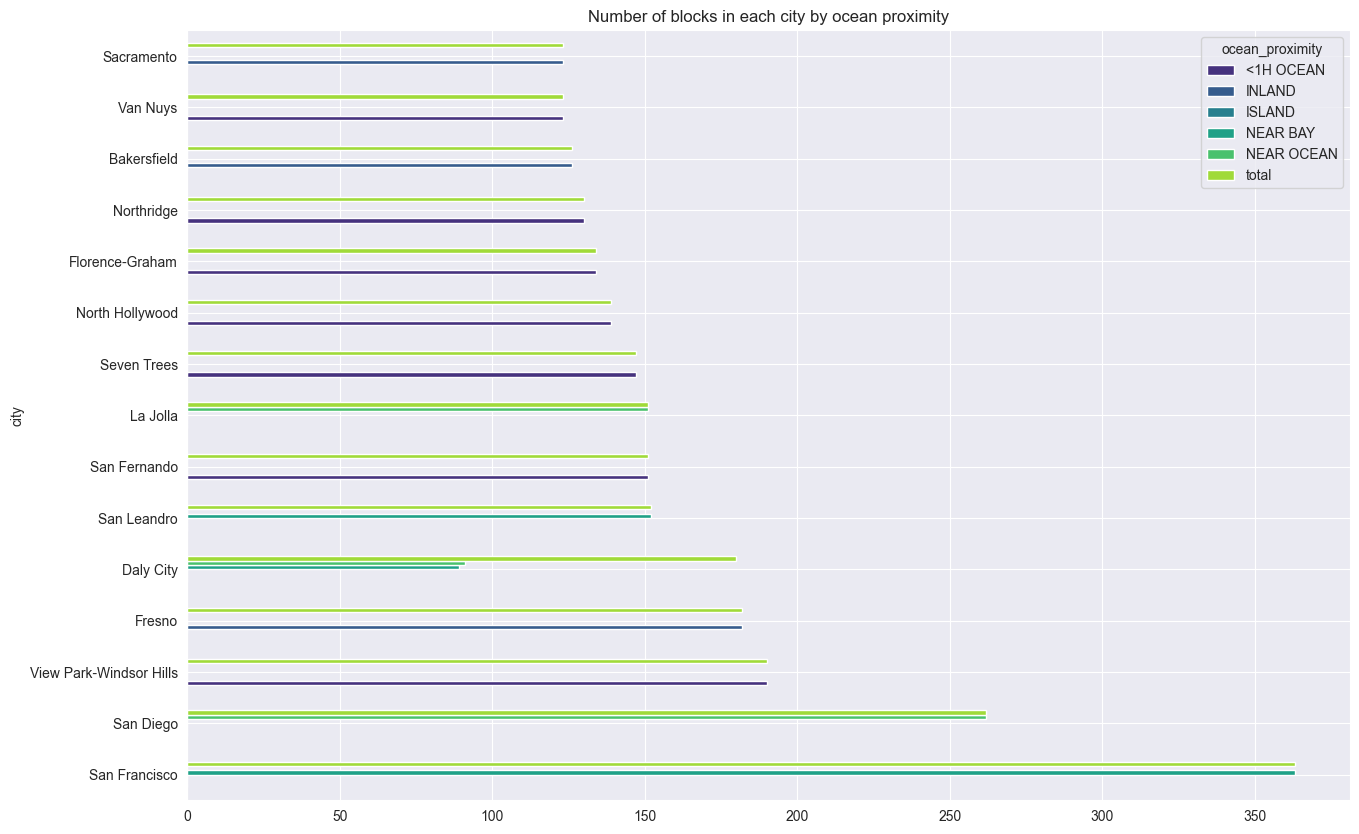

In [23]:
# plotting number of blocks in each city by ocean proximity
pd.crosstab(df["city"], df["ocean_proximity"]) \
.assign(total=lambda x: x.sum(axis=1)) \
.sort_values(by="total", ascending=False) \
.head(15)\
.plot(kind="barh", figsize=(15, 10), title="Number of blocks in each city by ocean proximity")

plt.show()

**City Size vs. Proximity:**
- San Francisco dominates total blocks (~350), with significant coastal access
- Sacramento, Fresno show pure inland development (expected for Central Valley)
- San Diego shows balanced coastal/inland mix despite being coastal city